In [1]:
import random, math, pylab, os

${\Huge \textrm{ Simulación 2D: Sistema de discos rı́gidos}}$

${\huge \textrm{Equiprobabilidad - Muestreo Directo}}$

-  La identificación computacional de configuraciones necesita el uso de pequeñas cajas como las mostradas en rojo en la figura. $\textbf{¿Por qué?}$

Esto se debe a que la computadora va a generar números float o double que tienen una precisión muy alta, por lo que pedir que se compare si un punto, que se refiere al centro de uno de los discos, es igual a otro punto, que es uno de los centros de un disco en una configuración aleatoria, llevaría un tiempo de cálculo muy alto. Por lo que se crea una variable $\textbf{del_xy}$ que controla la precisión con la que se quiere determinar si un punto dentro de una de las configuraciones de referencia y una de las configuraciones generadas aleatoriamente son iguales, creando un cuadrado de lado del_xy.

In [2]:
def direct_disks_box(N,sigma):
    condition = False
    
    while (condition == False):
        L = [(random.uniform(sigma,1.0-sigma),random.uniform(sigma,1.0-sigma))]
        
        for k in range(1,N):
            a = (random.uniform(sigma,1.0-sigma),random.uniform(sigma,1.0-sigma))
            min_dist = min(math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2) for b in L)
            
            if (min_dist < 2.0*sigma):
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L        

$\textbf{1. Estudie el programa y responda las siguientes preguntas:}$

$\textbf{(a)}$ ¿Cuál es el significado de sigma y de la definición direct disks box?

La función $\textbf{direct_disks_box}$ crea un arreglo con cuatro puntos en un plano, que simulan la posición central de 4 discos rígidos generados de manera aleatoria. Estás se crean de tal manera que los dicos deben estar a más de una distancia sigma de los bordes de la caja, para que parte de estos no estén por fuera de la caja, y que la distancia entre cada uno de los centros de los discos esté a mínimo 2 sigmas de otro, para así garantizar que los discos no se solapen entre sí. En este caso, sigma se refiere entonces a el radio de los discos, la distancia entre el centro y el borde de los discos rígidos.

$\textbf{(b)}$ ¿Bajo qué condiciones la variable lógica $\textbf{condition_hit}$ es verdadera.?

Primero se genera una configuración aleatoria de 4 discos con la función $\textbf{direct_disks_box}$. Después, se entra a un loop for que corre sobre cada una de las 3 configuraciones de referencia que se definieron, donde la variable lógica $\textbf{condition_hit}$ empieza siendo verdadera. Luego, se entra en un loop for que corre sobre cada uno de los 4 puntos que definen el centro de los discos de una configuración y se compara si cada uno de estos puntos está a mínimo una distancia en x o y de del_xy= 0.05, esto hace que la variable lógica $\textbf{condition_hit}$ sea verdadera si los cuatro puntos de la configuración de referencia estan a menos de una distancia distancia del_xy en x o y del punto más cercano de la configuración aleatoria generada con la función  $\textbf{direct_disks_box}$ (osea, cada uno de los puntos están dentro de la caja pequeña roja que le corresponde).

$\textbf{(c)}$ A qué se refiere la $\textbf{condicion_b}$ que aparece en la lı́nea 32 y el condicional que
aparece en las lı́neas 34 y 35.

$\textbf{condicion_b:}$ Es verdadera si para cada uno de los centros de los 4 discos de la configuración aleatoria generada por la función está dentro de la caja pequeña roja más cercana que están en los centros de las configuraciones de referencia. 

$\textbf{líneas 34 y 35:}$ Significa que si la variable lógica $\textbf{condition_hit}$ es verdadera para una de las configuraciones de referencia, se agregue uno a la cuenta de esta configuración. Osea, si cada uno los centros de los 4 discos de la configuración aleatoria está dentro de la caja pequeña roja más cercana que están en los centros de una de las configuraciones de referencia, entonces significa que esa configuración aleatoria es igual la configuración de referencia con la que se está comparando. 

In [3]:
sigma = 0.15
del_xy= 0.05
n_runs = 10000

conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70)) 
conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))
configurations = [conf_a,conf_b,conf_c] 
hits = {conf_a: 0, conf_b: 0, conf_c: 0,} # class dictionary

#print direct_disks_box(4,sigma)
for run in range(n_runs):
    x_vec = direct_disks_box(4,sigma)
    
    for conf in configurations:
        condition_hit = True
        
        for b in conf:
            condition_b = (min(max(abs(a[0] - b[0]),abs(a[1] - b[1])) for a in x_vec) < del_xy)
            condition_hit *= condition_b
            
        if (condition_hit):
            hits[conf] +=1
            
for conf in configurations:
    print (conf,hits[conf])

((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 1
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 2
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 3


$\textbf{2. Corra el programa para las siguientes situaciones:}$

$\textbf{(a)}$ Tres veces para $\textbf{n_runs}= 10^{4}$

$\textbf{(b)}$ Tres veces para $\textbf{n_runs}= 10^{5}$

$\textbf{(c)}$ Tres veces para $\textbf{n_runs}= 10^{6}$


Escriba en cada caso el número de hits para cada configuración a, b, c cada vez. 

- ¿Qué puede decir acerca de la equiprobabilidad?:

Se observa que entre más aumenta el número de eventos, automáticamente aumenta el número de configuraciones aleatorias que son iguales a las configuraciones de referencia. Además, la equiprobabilidad de las tres configuraciones de referencia es cada vez más evidente.

- ¿De qué manera estimarı́a las probabilidades asociadas a cada configuración?

Si es equiprobable, la probabilidad de una configuración se calcula como el número de hits de dicha configuración dividido el número de runs corridas. Osea, número de casos favorables dividido el número total de casos

In [4]:
sigma = 0.15
del_xy= 0.05
number_of_runs = [10000,100000,1000000] 

print("Equiprobabilidad - Muestreo Directo")
print("")

for n_runs in number_of_runs:
    print("Número de configuraciones generadas directamente:",n_runs)
    print("")
    
    for i in range(3):
        print("run", i+1,":")

        hits = {conf_a: 0, conf_b: 0, conf_c: 0,} # class dictionary

        for run in range(n_runs):
            x_vec = direct_disks_box(4,sigma)
            
            for conf in configurations:
                condition_hit = True
                
                for b in conf:
                    condition_b = (min(max(abs(a[0] - b[0]),abs(a[1] - b[1])) for a in x_vec) < del_xy)
                    condition_hit *= condition_b
                    
                if (condition_hit):
                    hits[conf] +=1
                    
        for conf in configurations:
            print (conf,hits[conf])
            
        print("")

Equiprobabilidad - Muestreo Directo

Número de configuraciones generadas directamente: 10000

run 1 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 1
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 0
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 2

run 2 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 1
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 0
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 1

run 3 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 1
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 2
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 2

Número de configuraciones generadas directamente: 100000

run 1 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 10
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 13
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 11

run 2 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 12
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 13
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 8

run 3 :
((0.3

$\textbf{3. Corra su programa de nuevo para sigma=0.15 y para del_xy=0.10 usando diferentes valores de n_runs.}$

- Explı́que qué sucede. ¿Qué pasarı́a si los tamaños de las cajas rojas son demasiado grandes?

Al momento de aumentar el valor de del_xy el tamaño de la caja pequeña roja aumenta, esta controla la precisión con la que se determina si una de las configuraciones aleatorias es igual a una de las 3 configuraciones de referencia, por lo que ahora al tener mayor tamaño no se puede determinar de manera precisa si una de las configuraciones aleatorias que pasó sí es idéntica a una de las tres de referencia, esto hace que, como se observa en los outputs, que ya no exista una equiprobabilidad para valores grandes de del_xy. Lo que nos muestra la importancia de la variable del_xt, si es muy grande ya no se puede determinar la equiprobabilidad porque van a haber eventos contados que no corresponden a los microestados, y si es muy pequeña, es difícil que se cuente algún evento debido al poder de cómputo disponible. 

In [5]:
sigma=0.15
del_xy_vec= [0.05,0.10,0.15]
number_of_runs = [1000,10000,100000,1000000] 

print("Equiprobabilidad - Muestreo Directo")
print("")

for n_runs in number_of_runs:
        
    for del_xy in del_xy_vec:
        print("Número de configuraciones generadas directamente:",n_runs)
        print("sigma =", sigma)
        print("del_xy =", del_xy)
        print("")
        
        hits = {conf_a: 0, conf_b: 0, conf_c: 0,} # class dictionary
            
        for run in range(n_runs):
            x_vec = direct_disks_box(4,sigma)
                
            for conf in configurations:
                condition_hit = True
                
                for b in conf:
                    condition_b = (min(max(abs(a[0] - b[0]),abs(a[1] - b[1])) for a in x_vec) < del_xy)
                    condition_hit *= condition_b
                   
                if (condition_hit):
                    hits[conf] +=1
                        
        for conf in configurations:
            print (conf,hits[conf])
            
        print("")

Equiprobabilidad - Muestreo Directo

Número de configuraciones generadas directamente: 1000
sigma = 0.15
del_xy = 0.05

((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 0
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 0
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 0

Número de configuraciones generadas directamente: 1000
sigma = 0.15
del_xy = 0.1

((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 16
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 7
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 5

Número de configuraciones generadas directamente: 1000
sigma = 0.15
del_xy = 0.15

((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 319
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 62
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 135

Número de configuraciones generadas directamente: 10000
sigma = 0.15
del_xy = 0.05

((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 0
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 1
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.

${\huge \textrm{Equiprobabilidad - Muestreo basado en Markov}}$

$\textbf{5. Estudie y modifique ahora el siguiente programa}$, el cual hace uso del concepto de
muestreo basado en cadenas de Markov - Markov-chain sampling- (en
qué consisten?), para chequear la equiprobabilidad de las configuraciones a, b, c
dadas anteriormente. Para ello incorpore y modifique en este nuevo programa lı́neas
del programa anterior.

- Markov-chain sampling - (¿en qué consisten?)
A Markov process is a stochastic process that satisfies the Markov property (sometimes characterized as "memorylessness"). In simpler terms, it is a process for which predictions can be made regarding future outcomes based solely on its present state and—most importantly—such predictions are just as good as the ones that could be made knowing the process's full history. In other words, conditional on the present state of the system, its future and past states are independent. 

$\textbf{6. Estudie el programa de la figura anterior y explique las lı́neas 9-14.}$

Primero, se debe definir una configuración inicial de discos, llamada L. Al entrar en el for se va a escoger la posición central de uno de los cuatro discos y se le va a sumar un número entre (-delta, delta) y así crear un nuevo disco movido un poco de su posición inicial. Luego, se van a crear dos variables: $\textbf{(1) min_dist:}$ Que calcula a cuál de las tres posiciones de los 3 discos restantes está más cerca el nuevo disco; $\textbf{(2) box_cond:}$ Que es verdadero cuando el radio del disco, dado por el parámetro sigma, esta por fuera de la caja.
Esto hace, que si no se cumple box_cond o que min_dist < $4\sigma^{2}$, osea, que el disco esté dentro de la caja y que el centro del disco esté a más de $4\sigma^{2}$ de los otros centros de los discos, entonces la posición del disco elegido entre los 4 de L se cambia por la nueva posición movida un poco. 

In [6]:
def markov_disk_box(L,sigma,delta):
    cond_mark = True
    
    while(cond_mark):
        a = random.choice(L)
        b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]
        min_dist = min((b[0] - c[0])**2+(b[1] - c[1])**2 for c in L if c != a)
        box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    
        if not (box_cond or min_dist < 4.0 * sigma**2):
            a[:] = b
            cond_mark = False
        else:
            cond_mark = True
            
    return(L)

L = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]
sigma = 0.15
delta = 0.1
n_steps = 100000
del_xy= 0.05

conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70)) 
conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))
configurations = [conf_a,conf_b,conf_c] 
hits = {conf_a: 0, conf_b: 0, conf_c: 0,} # class dictionary

In [7]:
#print markov_disks_box(4,sigma)
for steps in range(n_steps):
    x_vec = markov_disk_box(L, sigma, delta)
    
    for conf in configurations:
        condition_hit = True
        
        for b in conf:
            condition_b = (min(max(abs(a[0] - b[0]),abs(a[1] - b[1])) for a in x_vec) < del_xy)
            condition_hit *= condition_b
            
        if (condition_hit):
            hits[conf] +=1
            
for conf in configurations:
    print (conf,hits[conf])

((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 16
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 17
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 15


$\textbf{7. Una vez modificado dicho nuevo programa con base en lo solicitado en 5), córralo para las siguientes situaciones:}$

$\textbf{(a.)}$ Tres veces para n_runs = $10^{4}$

$\textbf{(b.)}$ Tres veces para n_runs = $10^{5}$

$\textbf{(c.)}$ Tres veces para n_runs = $10^{6}$

$\textbf{(d.)}$ Tres veces para n_runs = $10^{7}$ (opcional)

Escriba en cada caso el número de hits para cada configuración a, b, c cada vez.

- ¿Qué puede decir acerca de la equiprobabilidad en este caso? 

Nuevamente se puede observar que se cumple la equiprobabilidad, dentro del error que se tiene por la variable del_xy, y que esta equiprobabilidad se hace más evidente a medida que aumenta el número configuraciones generadas por Markov con las que se va a comparar.

- ¿De qué manera estimarı́a las probabilidades asociadas a cada configuración? 

Al igual que en el método de por muestreo directo, la probabilidad de una configuración se calcula como el número de hits de dicha configuración dividido el número de runs corridas. Osea, número de casos favorables dividido el número total de casos


- Compare sus resultados con los obtenidos inicialmente mediante el método de muestreo directo.

Lo primero que se puede observar es que el tiempo de cálculo aumenta, debido a que para poder generar una configuración por cadenas de Markov se debe hacer que desde una configuración inicial se muevan poco a poco los puntos de dicha configuración, haciendo mover 1000 veces en total los 4 puntos. Pero esto hace que la equiprobabilidad aumente, osea, que los números que aparecen las 3 configuraciones de referencia en cada run no se desvíen mucho entre ellos.

- ¿Qué puede decir acerca de los fluctuaciones de los resultados?
Se puede observar que es peor la conservación de la equiprobabilidad con este método.


In [8]:
L = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]
sigma = 0.15
delta = 0.1
n_steps = 1000
del_xy= 0.05
number_of_steps = [10000,100000,1000000] 
#number_of_steps = [10000,100000,1000000,10000000] 

print("Equiprobabilidad - Muestreo basado en Markov")
print("\n\n")

for n_steps in number_of_steps:
    print("Número de configuraciones generadas por Markov:",n_steps)
    print("")
    
    for i in range(3):
        print("run", i+1,":")

        hits = {conf_a: 0, conf_b: 0, conf_c: 0,} # class dictionary

        for run in range(n_steps):
            x_vec = markov_disk_box(L,sigma,delta)
            
            for conf in configurations:
                condition_hit = True
                
                for b in conf:
                    condition_b = (min(max(abs(a[0] - b[0]),abs(a[1] - b[1])) for a in x_vec) < del_xy)
                    condition_hit *= condition_b
                    
                if (condition_hit):
                    hits[conf] +=1
                    
        for conf in configurations:
            print (conf,hits[conf])
            
        print("")

Equiprobabilidad - Muestreo basado en Markov



Número de configuraciones generadas por Markov: 10000

run 1 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 4
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 1
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 0

run 2 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 1
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 0
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 0

run 3 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 2
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 2
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 0

Número de configuraciones generadas por Markov: 100000

run 1 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 19
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 13
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 20

run 2 :
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 15
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 7
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 24

run 3 

${\huge \textrm{Equiprobabilidad - Muestreo basado en eventos}}$

Incorpore ahora las siguientes dos definiciones de eventos de colisión en el
programa de la página siguiente. Dicho programa realiza un muestreo basados en eventos (de colisión) usando
dinámica molecular.

$\textbf{8. Investigue en qué consiste la modelación usando dicha dinámica (dinámica molecular)}$
y en particular acerca del algoritmo event-driven Molecular dynamics por Alder and Wainwright (1957). ¿Qué es un evento?  

Es un método basado en la computación de los movimientos y las interacciones de partículas. Las simulaciones basadas en dinámica molecular son más realistas y exactas, que las basadas en Simulación Directa por Monte Carlo, ya que cada partícula representa una molécula real y se sabe exactamente su posición y velocidad. 

Para modelar estos sistemas como un conjunto de partículas rígidas es una alternativa a una interacción continua de un potencial. La interacción entre dos entre partículas rígidas es discreta, osea, no hay fuerzas extendidas excepto en los impactos. Sin campos externos, las trayectorias son lineales. Las colisiones son instantaneas y binarias. Cuando ocurren colisiones, luego de estas las nuevas velocidades son calculadas por conservación de la energía y momentum. 
Los tiempos de colisión predichos analíticamente producen la descomposición de la simulación en una serie de $\textbf{eventos asincrónicos}$. Este proceso llevada por medio de eventos, ya que el tiempo avanza de un evento al siguiente. Por lo que un proceso llevado por eventos es más fácil de simular para bastantes partículas que uno llevado por tiempo.
Se golpea si la distancia entre  la pared y el centro de laa molécula es la mitad del diametro de la molécula. Se devuelve de acuerdo a un modelo de pared: Cuando una molécula se encuentra con una frontera ella se mueve con el mismo vector de velocidad pero en sentido contrario.

In [9]:
def wall_time(pos_a, vel_a, sigma):
    if (vel_a > 0.0):
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif (vel_a < 0.0):
        del_t = (pos_a -sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0]**2 + del_x[1]**2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0]**2 + del_v[1]**2
    
    scal = del_v[0]*del_x[0] + del_v[1]*del_x[1]
    Upsilon = scal**2 - del_v_sq *(del_x_sq - 4.0*sigma**2)
    
    if (Upsilon > 0.0 and scal < 0.0):
        del_t = -(scal + math.sqrt(Upsilon))/del_v_sq
    else:
        del_t = float('inf')
    return del_t
    

- Explique cada lı́nea de código:

In [10]:
#Se inicia con unas configuraciones de referencia para comprobar la equiprobabilidad.
conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70)) 
conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))
configurations = [conf_a,conf_b,conf_c] 
hits = {conf_a: 0, conf_b: 0, conf_c: 0,} # class dictionary
# un del_xy para las cajas en el centro de los discos que controlan con qué precisión se quiere que un disco 
# esté en la misma posición que otro.
del_xy = 0.10

# vectores de posición y velocidad iniciales para una configuración de cuatro discos generada por eventos
pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]

# Se refiere a una configuración para controlar las colisiones de las paredes, donde el primer número dice cuál es
# el disco que va a colisionar, y el segundo si este colisiona o no.
singles = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]

# Se refiere a una configuración para controlar las colisiones entre discos, donde cada par de números se refiere
# a cada una de las colisiones posibles entre los 4 discos.
pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]

sigma = 0.10 # Radio de los discos
t = 0.0 # tiempo inicial
n_events = 5000000 # número de eventos en los que va a evolucionar el tiempo

for event in range(n_events): 
    # Se calcula un delta de tiempo para cada disco basado en la velocidad que lleva el disco para controlar las
    # colisiones con las paredes
    wall_times = [wall_time(pos[k][l],vel[k][l],sigma) for k,l in singles]
    
    # Se calcula un delta de tiempo para cada par de discos basado en su posición y velocidades para controlar las
    # colisiones entre estos
    pair_times = [pair_time(pos[k],vel[k],pos[l],vel[l],sigma) for k,l in pairs]
    
    # El mínimo de la suma entre los deltas de tiempo de las paredes y de los pares de discos es lo que se
    # va a sumar al tiempo para encontrar el siguiente evento
    next_event = min(wall_times + pair_times)
    
    #el t_anterior ahora es t
    t_previous = t

    # Este for es entre el t (tiemp anterior) y el t+next_event (Se calcula el próximo evento)
    # solo se entra a este for si next_event es lo suficientemente grande para diferenciar int(t+1) de 
    # int(t+next_event+1). Esto debido a que la condición para calcular la equiprobabilidad es un proceso discreto. 
    for inter_times in range(int(t+1),int(t+next_event+1)):
        
        # delta de tiempo es el iner_times, que es un entero, menos t_previous (el tiempo anterior) que es un float
        del_t = inter_times - t_previous
        
        # Se calcula la nueva posición de cada uno de los discos con la ecuación cinemática
        for k, l in singles:
            pos[k][l] += vel[k][l]*del_t
        
        
        t_previous = inter_times
        
        # Se hace la comparación de que si la configuración de la nueva posición del disco es, 
        # dentro de una precisión controlada por del_xy, igual a una de las configuraciones de referencia
        # y si lo es agrega uno a un contador para esa configuración.
        for conf in configurations:
            condition_hit = True
            
            for b in conf:
                condition_b = min(max(abs(a[0]-b[0]),abs(a[1]-b[1])) for a in pos) < del_xy
                condition_hit *= condition_b
                
            if condition_hit:
                hits[conf] += 1
                
    # El nuevo tiempo es el t anterior más es next_event
    t += next_event
    
    # El delta de tiempo es el t nuevo menos el t_previous (t anterior)
    del_t = t - t_previous
    
    # Se calcula la nueva posición de cada uno de los discos con la ecuación cinemática
    for k,l in singles:
        pos[k][l] += vel[k][l]*del_t
    
    # Si se cumple la condición es porque uno de los discos está muy cerca de una de las paredes
    if min(wall_times) < min(pair_times):
        # Se mira qué disco está colisionando y si este sí colisiona contra la pared
        collision_disk, direction = singles[wall_times.index(next_event)]
        # Hace que el vector de velocidad del disco cambie a la dirección opuesta luego de la colision
        vel[collision_disk][direction] *= -1.0
    
    # Se cumple si dos discos están muy cerca entre sí y van a colisionar
    else:
        a, b = pairs[pair_times.index(next_event)] # Se mira qué par de discos van a colisionar
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]] 
        abs_x = math.sqrt(del_x[0]**2 + del_x[1]**2) #Se calcula la distancia entre los discos
        
        # Se calculan unas variables a partir de las variables cinemáticas de los discos
        e_perp = [c/abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        
        # Se halla la nueva velocidad del par de discos con las variables calculadas antes teniendo en cuenta 
        # la conservación del momentum lineal
        for k in range(2):
            vel[a][k] += e_perp[k]*scal
            vel[b][k] -= e_perp[k]*scal

# Se imprimen las veces que la configuración por eventos fue iguala una de las configuraciones de referencia
for conf in configurations:
    print (conf, hits[conf])

((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 667
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 634
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 672


$\textbf{9. Note que dicho programa arroja como salida las posiciones asociadas a
configuraciones de eventos.}$ 
- ¿Son las posiciones asociadas a eventos igualmente probables? Justifique su respuesta.

No son igualmente probables, hablando estrictamente, pero sí lo son dentro de un error asociado al tamaño de la caja y al radio de los discos. Ya que el lado de la caja, en este caso, es igual al radio del disco.





${\huge \textrm{Equiprobabilidad - Histograma de posiciones}}$

- Explique por qué no se obtiene un histograma constante o plano que es lo que en
principio se esperarı́a para una distribución equiprobable, y qué serı́a necesario
implementar para corregir dicho problema.



In [11]:
def direct_disks_box(N,sigma):
    condition = False
    
    while (condition == False):
        L = [(random.uniform(sigma,1.0-sigma),random.uniform(sigma,1.0-sigma))]
        
        for k in range(1,N):
            a = (random.uniform(sigma,1.0-sigma),random.uniform(sigma,1.0-sigma))
            min_dist = min(math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2) for b in L)
            
            if (min_dist < 4.0*sigma**2):
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L

In [12]:
N = 4
sigma0= 0.15
sigma = 0.1197
sigma2= 0.09
sigma3= 0.07
n_runs = 1000000
histo_data0 = []
histo_data  = []
histo_data2 = []
histo_data3 = []

for run in range(n_runs):
    pos0= direct_disks_box(N,sigma0)
    pos = direct_disks_box(N,sigma)
    pos2= direct_disks_box(N,sigma2)
    pos3= direct_disks_box(N,sigma3)
    for k in range(N):
        histo_data0.append(pos0[k][0])
        histo_data.append(pos[k][0])
        histo_data2.append(pos2[k][0])
        histo_data3.append(pos3[k][0])

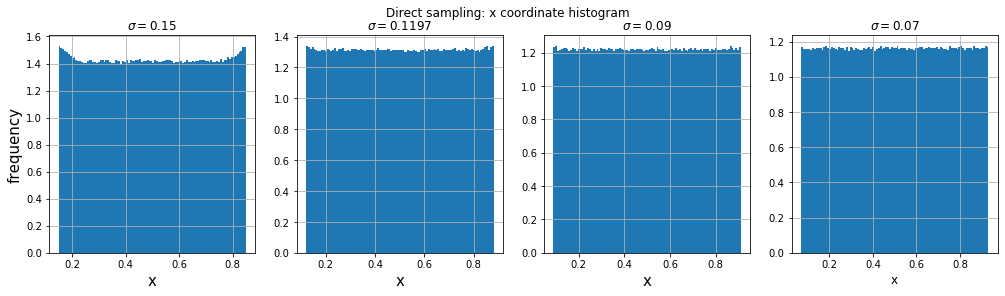

In [13]:
fig, (ax1, ax2, ax3, ax4) = pylab.subplots(1, 4,figsize=(17,4))

ax1.hist(histo_data0, bins=100,density=True)
ax1.set_xlabel('x',fontsize=15)
ax1.set_ylabel('frequency', fontsize=15)
ax1.set_title('$\sigma=0.15$', fontsize=12)
ax1.grid()

ax2.hist(histo_data, bins=100,density=True)
ax2.set_xlabel('x',fontsize=15)
#ax2.set_ylabel('frequency', fontsize=15)
ax2.set_title('$\sigma=0.1197$', fontsize=12)
ax2.grid()

ax3.hist(histo_data2, bins=100,density=True)
ax3.set_xlabel('x',fontsize=15)
#ax3.set_ylabel('frequency', fontsize=12)
ax3.set_title('$\sigma=0.09$', fontsize=12)
ax3.grid()

ax4.hist(histo_data3, bins=100,density=True)
ax4.set_xlabel('x',fontsize=12)
#ax4.set_ylabel('frequency', fontsize=12)
ax4.set_title('$\sigma=0.07$', fontsize=12)
ax4.grid()

fig.suptitle('Direct sampling: x coordinate histogram', fontsize=12)
fig.savefig('direct_disk_histo.png')

In [15]:
N = 4
sigma  = 0.15
sigma2 = 0.1197
sigma3 = 0.09
sigma4 = 0.07


histo_data = []
histo_data2= []
histo_data3= []
histo_data4= []

L = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]
L2 = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]
L3 = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]
L4 = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]

delta = 0.1
n_steps = 2000000


for steps in range(n_steps):
    pos = markov_disk_box(L,sigma,delta)
    pos2= markov_disk_box(L2,sigma2,delta)
    pos3= markov_disk_box(L3,sigma3,delta)
    pos4= markov_disk_box(L4,sigma4,delta)
    
    for k in range(N):
        histo_data.append(pos[k][0])
        histo_data2.append(pos2[k][0])
        histo_data3.append(pos3[k][0])
        histo_data4.append(pos4[k][0])

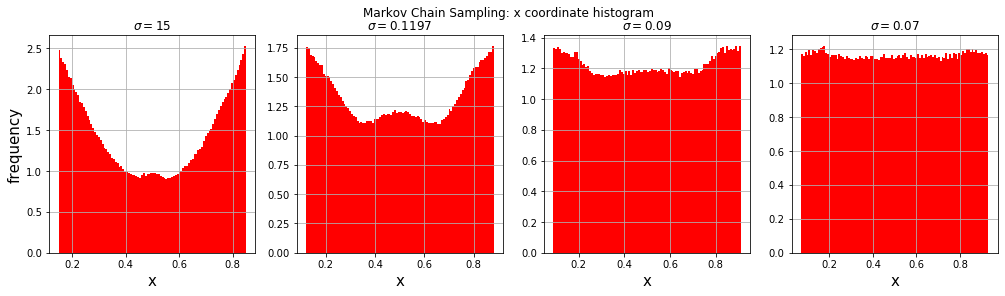

In [18]:
fig, (ax1, ax2, ax3, ax4) = pylab.subplots(1, 4,figsize=(17,4))

ax1.hist(histo_data, bins=100,density=True, color='r')
ax1.set_xlabel('x',fontsize=15)
ax1.set_ylabel('frequency', fontsize=15)
ax1.set_title('$\sigma=15$', fontsize=12)
ax1.grid()

ax2.hist(histo_data2, bins=100,density=True,color='r')
ax2.set_xlabel('x',fontsize=15)
#ax2.set_ylabel('frequency', fontsize=15)
ax2.set_title('$\sigma=0.1197$', fontsize=12)
ax2.grid()

ax3.hist(histo_data3, bins=100,density=True,color='r')
ax3.set_xlabel('x',fontsize=15)
#ax3.set_ylabel('frequency', fontsize=15)
ax3.set_title('$\sigma=0.09$', fontsize=12)
ax3.grid()

ax4.hist(histo_data4, bins=100,density=True,color='r')
ax4.set_xlabel('x',fontsize=15)
#ax3.set_ylabel('frequency', fontsize=15)
ax4.set_title('$\sigma=0.07$', fontsize=12)
ax4.grid()

fig.suptitle('Markov Chain Sampling: x coordinate histogram', fontsize=12)
fig.savefig('markov_disk_histo.png')

In [19]:
hits = {conf_a: 0, conf_b: 0, conf_c: 0,} # class dictionary

def event_drive_histo(sigma):
    del_xy = 0.10
    pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
    vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
    t = 0.0 # tiempo inicial
    n_events = 5000000 # número de eventos en los que va a evolucionar el tiempo
    histograma_data = []
    
    for event in range(n_events): 
        wall_times = [wall_time(pos[k][l],vel[k][l],sigma) for k,l in singles]
        pair_times = [pair_time(pos[k],vel[k],pos[l],vel[l],sigma) for k,l in pairs]
        next_event = min(wall_times + pair_times)
        t_previous = t
     
        for inter_times in range(int(t+1),int(t+next_event+1)):
            del_t = inter_times - t_previous
            
            for k, l in singles:
                pos[k][l] += vel[k][l]*del_t
                histograma_data.append(pos[k][0])
                
            t_previous = inter_times
            
            for conf in configurations:
                condition_hit = True
                
                for b in conf:
                    condition_b = min(max(abs(a[0]-b[0]),abs(a[1]-b[1])) for a in pos) < del_xy
                    condition_hit *= condition_b
                    
                if condition_hit:
                    hits[conf] += 1
                    
        t += next_event
        del_t = t - t_previous
        for k,l in singles:
            pos[k][l] += vel[k][l]*del_t
    
        if min(wall_times) < min(pair_times):
            collision_disk, direction = singles[wall_times.index(next_event)]
            vel[collision_disk][direction] *= -1.0
        
        else:
            a, b = pairs[pair_times.index(next_event)] # Se mira qué par de discos van a colisionar
            del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]] 
            abs_x = math.sqrt(del_x[0]**2 + del_x[1]**2) #Se calcula la distancia entre los discos
        
            e_perp = [c/abs_x for c in del_x]
            del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
            scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
            
            for k in range(2):
                vel[a][k] += e_perp[k]*scal
                vel[b][k] -= e_perp[k]*scal
    return histograma_data

In [ ]:
sigma = 0.15 # Radio de los discos
sigma2 = 0.1197
sigma3 = 0.09
sigma4 = 0.06

histo_data = event_drive_histo(sigma)
histo_data2 = event_drive_histo(sigma2)
histo_data3 = event_drive_histo(sigma3)
histo_data4 = event_drive_histo(sigma4)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = pylab.subplots(1, 3,figsize=(15,5))

ax1.hist(histo_data, bins=100,density=True,color='g')
ax1.set_xlabel('x',fontsize=15)
ax1.set_ylabel('frequency', fontsize=15)
ax1.set_title('$\sigma=0.15$', fontsize=14)
ax1.grid()

ax2.hist(histo_data2, bins=100,density=True,color='g')
ax2.set_xlabel('x',fontsize=15)
#ax2.set_ylabel('frequency', fontsize=15)
ax2.set_title('$\sigma=0.01197$', fontsize=15)
ax2.grid()

ax3.hist(histo_data3, bins=100,density=True, color='g')
ax3.set_xlabel('x',fontsize=15)
#ax3.set_ylabel('frequency', fontsize=15)
ax3.set_title('$\sigma=0.09$', fontsize=15)
ax3.grid()

ax4.hist(histo_data3, bins=100,density=True, color='g')
ax4.set_xlabel('x',fontsize=15)
#ax4.set_ylabel('frequency', fontsize=15)
ax4.set_title('$\sigma=0.07$', fontsize=15)
ax4.grid()

fig.suptitle('Event Drive Sampling: x coordinate histogram', fontsize=18)
fig.savefig('event_disk_histo.png')

${\large \textrm{5. Animación}}$

In [ ]:
output_dir = "event_disks_box_movie"
colors = ['r', 'b', 'g', 'orange']

def min_arg(l):
    return min(zip(l, range(len(l))))

def compute_next_event(pos,vel):
    wall_times = [wall_time(pos[k][l],vel[k][l],sigma) for k,l in singles]
    pair_times = [pair_time(pos[k],vel[k],pos[l],vel[l],sigma) for k,l in pairs]
    return min_arg(wall_times + pair_times)

def compute_new_velocities(pos, vel, next_event_arg):
    
    if(next_event_arg<len(singles)):
        collision_disk, direction = singles[next_event_arg]
        vel[collision_disk][direction] *= -1.0
        
    else:
        a, b = pairs[next_event_arg - len(singles)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0]**2 + del_x[1]**2)
        e_perp = [c/abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        
        for k in range(2):
            vel[a][k] += e_perp[k]*scal
            vel[b][k] -= e_perp[k]*scal

In [ ]:
def snapshot(t, pos, vel, colors, sigma, arrow_scale=0.2):
    pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
    pylab.gcf().set_size_inches(6, 6)
    

    if not os.path.exists(output_dir): os.makedirs(output_dir)
    global img
    pylab.cla()
    pylab.axis([0, 1, 0, 1])
    pylab.setp(pylab.gca(), xticks=[0, 1], yticks=[0,1])
    
    for (x,y), (dx,dy), c in zip(pos,vel,colors):
        dx *= arrow_scale
        dy *= arrow_scale
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
        pylab.arrow(x, y, dx, dy, fc ="k",ec="k", head_width=0.05, head_length=0.05)
    pylab.text(0.5, 1.03, '$\sigma$=%.2f, t=%.2f' % (sigma,t), ha='center')
    pylab.savefig(os.path.join(output_dir, '%04i.png' % img))
    img += 1

def image_creation(n_steps, sigma):
    
    pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
    vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
    singles = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]
    pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
    t = 0.0
    dt = 0.02
    next_event, next_event_arg = compute_next_event(pos, vel)
    snapshot(t, pos, vel, colors,sigma)
    
    for step in range(n_steps):

        if dt:
            next_t = t + dt

        else:
            next_t = t + next_event

        while (t + next_event <= next_t):
            t += next_event

            for k, l in singles:
                pos[k][l] += vel[k][l] * next_event

            compute_new_velocities(pos, vel, next_event_arg)
            next_event, next_event_arg = compute_next_event(pos,vel)

        remain_t = next_t - t

        for k, l in singles:
            pos[k][l] += vel[k][l] * remain_t

        t += remain_t
        next_event -= remain_t
        snapshot(t, pos, vel, colors, sigma)
        if(int(t*100)%50 ==0):
            print('time:','%.1f' % t,'s')

In [ ]:
import imageio

def gif_generator(sigma):
    sigma=int(sigma*100)
    print('Producing animation_sigma%04i.gif using imageio...' % sigma)
    
    images = []
    filenames = ["{}".format('event_disks_box_movie/%04i.png' % img) for img in range(201)]

    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('event_disks_box_movie/animation_sigma%04i.gif' % sigma, images)

    print('animation_sigma%04i.gif created!' % sigma)


In [ ]:
img = 0
sigma = 0.15
n_steps = 200

image_creation(n_steps, sigma)
gif_generator(sigma)

![SegmentLocal](event_disks_box_movie/animation_sigma0015.gif "segment")

In [ ]:
img = 0
sigma = 0.10
n_steps = 200

image_creation(n_steps, sigma)
gif_generator(sigma)

![SegmentLocal](event_disks_box_movie/animation_sigma0010.gif "segment")

In [ ]:
img = 0
sigma = 0.05
n_steps = 200

image_creation(n_steps, sigma)
gif_generator(sigma)

![SegmentLocal](event_disks_box_movie/animation_sigma0005.gif "segment")